In [0]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Two sample Z test for proportions
We consider two conversion rates (proportions), that is, the number of users that generate a conversion with respect to total users in that group.

## Normal distribution approximation of the binomial distribution
The Binomial distribution can be approximated with a normal distribution if the sample size is sufficiently large. For example if $np$ amd $n(1-p)$ are both greater than 5 then the approximation is justified. In our case we can use the approximation. The normal distribution will then be $\mathcal{N}\bigg(p, \frac{p(1-p)}{n}\bigg)$.
Let us plot again the binomial distributions with the normal approximations.

In [0]:
# number of samples in each group
n_A = 200
n_B = 300

# proportions = conversion rates
p_A = .4
p_B = .43

# significance level
signif_level = 0.05

# normal approximation for a binomial
sigma_A = np.sqrt(p_A * (1 - p_A) / n_A)
sigma_B = np.sqrt(p_B * (1 - p_B) / n_B)

# distributions of conversion rates
norm_A = stats.norm(loc=p_A, scale=sigma_A) 
norm_B = stats.norm(loc=p_B, scale=sigma_B) 

In [0]:
def abplot(dist_A, dist_B, signif_level):
  p_A, sigma_A = dist_A.stats()
  p_B, sigma_B = dist_B.stats()

  f, ax = plt.subplots(1, 1, figsize=(12, 6))
  
  x = np.linspace(dist_A.ppf(0.00001), dist_A.ppf(0.99999), 200)
  ax.plot(x, dist_A.pdf(x), label='pdf A')  # the .pdf is actally a density, it integrates to 1
  ax.axvline(p_A, lw=1, ls='--')

  x = np.linspace(dist_B.ppf(0.00001), dist_B.ppf(0.99999), 200)
  ax.plot(x, dist_B.pdf(x), label='pdf B')  
  ax.axvline(p_B, lw=1, ls='--', color="darkorange")

  ax.axvline(dist_A.ppf(1-signif_level), color='k', lw=1.5, ls='--', label=r"crit. value $\alpha$ = 0.5")

  argmin = np.argmin(np.abs(dist_A.ppf(1 - signif_level) - x))
  power = np.trapz(dist_B.pdf(x)[argmin:], x[argmin:])
  ax.fill_between(x[argmin:], dist_B.pdf(x)[argmin:], alpha=0.4, color="darkorange")

  effect_size = p_B - p_A
  plt.title("Power (shaded) = {:1.3f}. Effect Size = {:1.3f}, Signif. Level = {:1.3f}"
  .format(np.trapz(dist_B.pdf(x)[argmin:], x[argmin:]), effect_size, signif_level), fontsize=16)
  ax.legend(fontsize=16);

  ax.set_ylabel("pdf", fontsize=16)

  return power

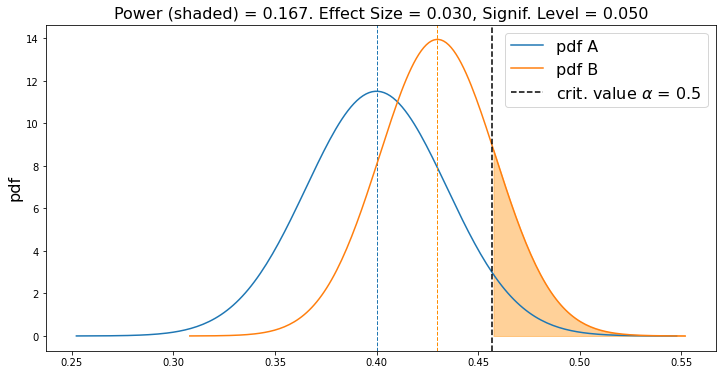

In [92]:
_ = abplot(norm_A, norm_B, signif_level)

The sample sizes are perhaps too small, we could also try changing the significance level or settling for a low power test. Let's try by changing the sample sizes aiming at a significance level of 5% and a power of 80%

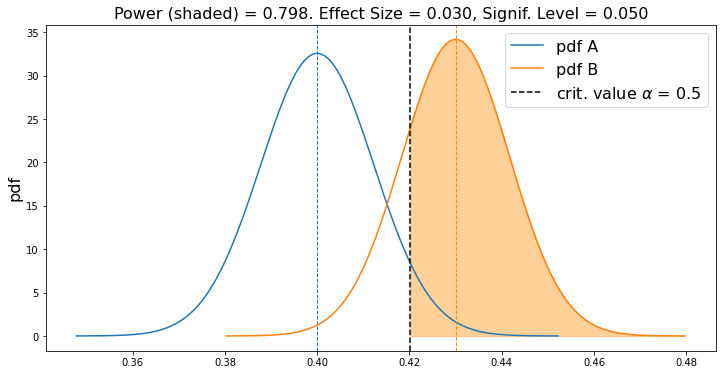

In [100]:
# sample sizes for the two groups
n_A = 1600
n_B = 1800

# proportions of success = conversion rate
p_A = .4
p_B = .43

# significance level
sl = 0.05

sigma_A = np.sqrt(p_A * (1 - p_A) / n_A)
sigma_B = np.sqrt(p_B * (1 - p_B) / n_B)

norm_A = stats.norm(loc=p_A, scale=sigma_A) 
norm_B = stats.norm(loc=p_B, scale=sigma_B) 

power = abplot(norm_A, norm_B, signif_level=sl)

After a few tries we get that with $n_A = 1600$ and $n_B = 1800$ we can proceed with the Z test having a power of 80% and a significance level of 5%. Time to run the test and see if we reject or fail to reject the Null.

## Two sample Z-test for proportions
Assumptions:
1. The samples in the groups are independently taken
2. The populations of the groups A and B are approximately normal, or the number of sample is sufficiently high for a normal approximation
3. Equal or almost equal variance of the two distributions

Let's state the hypotheses in terms of the average conversion rates (proportions) $p$:
1. $H_0$: there is no difference between the means of conversion rates `p_A` and `p_B`
2. $H_a$: the two proportions are different

In other words:
1. $H_0$: $p_A = p_B$ or $p_A - p_B = p_D = 0$ 
2. $H_1$: $p_A \neq p_B$  or $p_D > 0$

The test statistics follows a *standard normal*.
Under the Null $p_A = p_B$ it is calculated as:


$$ Z = \frac{(\hat{p_A} - \hat{p_B})}{\sqrt{\hat{p}(1-\hat{p})(1/n_A + 1/n_B))}} = \frac{\text{effect size (A/B difference)}}{SE} , \\
\hat{p} = \frac{p_A\,n_A + p_B \, n_B}{n_A + n_B}, \\
SE = \sqrt{\hat{p}(1-\hat{p})(1/n_A + 1/n_B)}$$


where $p_A$ and $p_B$ are the proportions for the two groups and $n_A$ and $n_B$ are the number of samples for each group. Moreover
$\hat{p}=\frac{Y_A + Y_B}{n_A + n_B}$ where $Y$ is the number of successes (number of clicks/purchases/subscription) in the respective group. The variable $Z$ is normally distributed.

In [0]:
def two_prop_test(Z, signif_level):
  std_norm = stats.norm(loc=0, scale=1)
  x = np.linspace(-5, 5, 200)

  f, ax = plt.subplots(figsize=(12, 6))

  ax.plot(x, std_norm.pdf(x))
  ax.axvline(std_norm.ppf(1 - signif_level), ls='--')
  ax.axvline(std_norm.ppf(signif_level), ls='--')

  argmin = np.argmin(np.abs(std_norm.ppf(1 - signif_level) - x))
  ax.fill_between(x[argmin:], std_norm.pdf(x)[argmin:])

  argmin = np.argmin(np.abs(std_norm.ppf(signif_level) - x))
  ax.fill_between(x[:argmin + 1], std_norm.pdf(x)[:argmin + 1], color='#1f77b4')

  ax.set_title("standard normal", fontsize=16)
  ax.set_ylabel("pdf", fontsize=16)

  ax.axvline(Z, color='k', label="Z = {:1.3f}".format(Z))
  ax.legend(fontsize=16);

  lower_crit = std_norm.ppf(signif_level)
  higher_crit = std_norm.ppf(1 - signif_level)
  print("Two tailed Two sample Z-test for proportions. Significance level = {}".format(signif_level/2))
  if Z < lower_crit:
    print("Test Statistics = {:1.3f},  critical value= {:1.3f}".format(Z, lower_crit))
    print("Reject the Null at {:1.3f} significance level with power = {:1.3f}".format(sl, power))
    print("The two proportions are different in a statistically significant manner")
    print("")
  elif Z > higher_crit:
    print("Test Statistics = {:1.3f},  critical value= {:1.3f}".format(Z, higher_crit))
    print("Reject the Null at {:1.3f} significance level with power = {:1.3f}".format(sl, power))
    print("The two proportions are different in a statistically significant manner")
    print("")
  else:
    print("Test Statistics = {:1.3f}".format(Z))
    print("Fail to reject the Null at {:1.3f} significance level with power = {:1.3f}".format(sl, power))
    print("The two proportions are not different in a statistically significant manner")
    print("")

Two tailed Two sample Z-test for proportions. Significance level = 0.025
Test Statistics = -1.772,  critical value= -1.645
Reject the Null at 0.050 significance level with power = 0.798
The two proportions are different in a statistically significant manner



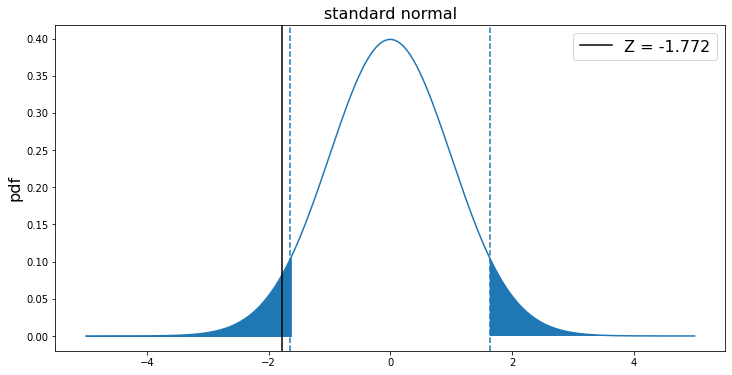

In [101]:
# sample sizes for the two groups
n_A = 1600
n_B = 1800

# proportions of success = conversion rate
p_A = .4
p_B = .43

# significance level
sl = 0.05

p_hat = (p_A * n_A + p_B * n_B)/(n_A + n_B)
se = np.sqrt(p_hat * (1 - p_hat) * (1/n_A + 1/n_B))
Z = (p_A - p_B) / se

two_prop_test(Z, sl)

**We barely make it to pass the test**.If we try with much smaller sample sizes we get

Two tailed Two sample Z-test for proportions. Significance level = 0.025
Test Statistics = -0.797
Fail to reject the Null at 0.050 significance level with power = 0.253
The two proportions are not different in a statistically significant manner



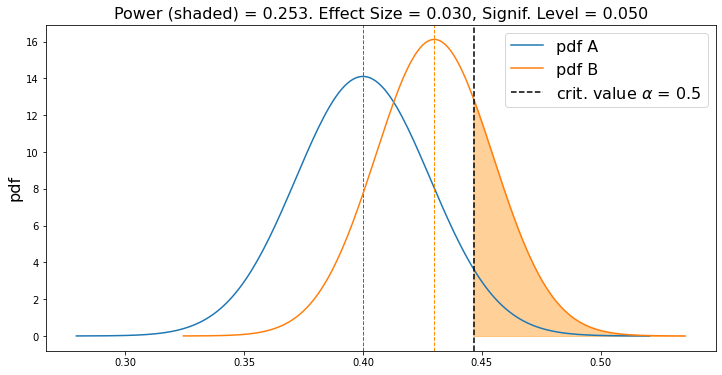

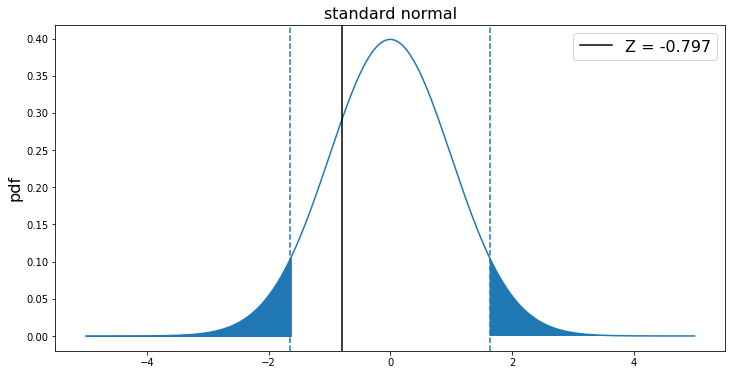

In [71]:
# sample sizes for the two groups
n_A = 300
n_B = 400

# proportions of success = conversion rate
p_A = .4
p_B = .43

# significance level
sl = 0.05

sigma_A = np.sqrt(p_A * (1 - p_A) / n_A)
sigma_B = np.sqrt(p_B * (1 - p_B) / n_B)

p_hat = (p_A * n_A + p_B * n_B)/(n_A + n_B)
se = np.sqrt(p_hat * (1 - p_hat) * (1/n_A + 1/n_B))
Z = (p_A - p_B) / se

norm_A = stats.norm(loc=p_A, scale=sigma_A) 
norm_B = stats.norm(loc=p_B, scale=sigma_B) 

power = abplot(norm_A, norm_B, signif_level=sl)
two_prop_test(Z, sl)

## Minimum Detectable Effect Size
Keeping the significance level, the power and the number of samples fixed, what is the minimum effect size that we can detect to have a significant test?

Two tailed Two sample Z-test for proportions. Significance level = 0.025
Test Statistics = -1.654,  critical value= -1.645
Reject the Null at 0.050 significance level with power = 0.747
The two proportions are different in a statistically significant manner



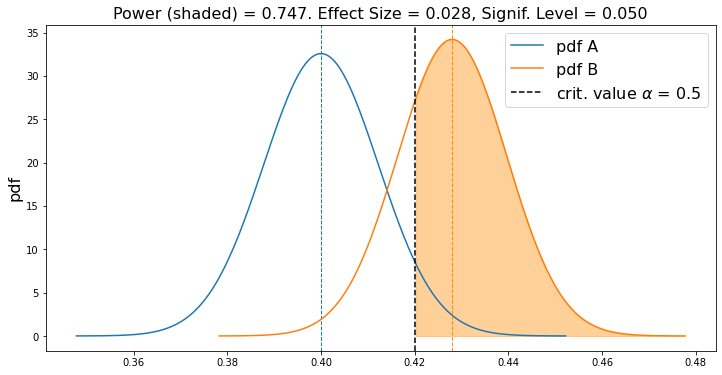

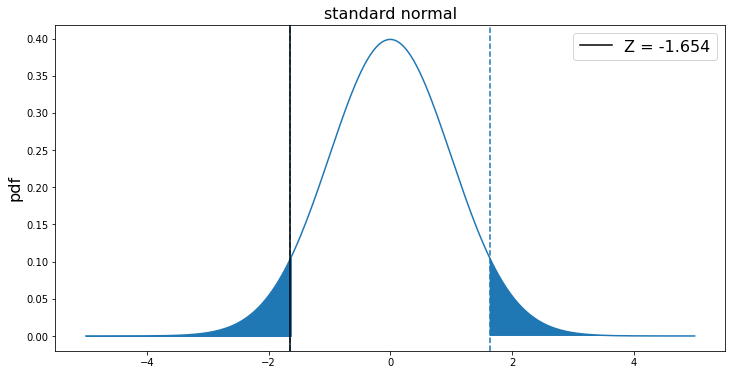

In [103]:
# sample sizes for the two groups
n_A = 1600
n_B = 1800

# proportions of success = conversion rate
p_A = .4
p_B = .428

# significance level
sl = 0.05

sigma_A = np.sqrt(p_A * (1 - p_A) / n_A)
sigma_B = np.sqrt(p_B * (1 - p_B) / n_B)

p_hat = (p_A * n_A + p_B * n_B)/(n_A + n_B)
se = np.sqrt(p_hat * (1 - p_hat) * (1/n_A + 1/n_B))
Z = (p_A - p_B) / se

norm_A = stats.norm(loc=p_A, scale=sigma_A) 
norm_B = stats.norm(loc=p_B, scale=sigma_B) 

power = abplot(norm_A, norm_B, signif_level=sl)
two_prop_test(Z, sl)

**The minimum detectable effect size is 0.028**. If we want to detect smaller effects we need to increase the sample sizes. Let's try.

Two tailed Two sample Z-test for proportions. Significance level = 0.025
Test Statistics = -1.740,  critical value= -1.645
Reject the Null at 0.050 significance level with power = 0.798
The two proportions are different in a statistically significant manner



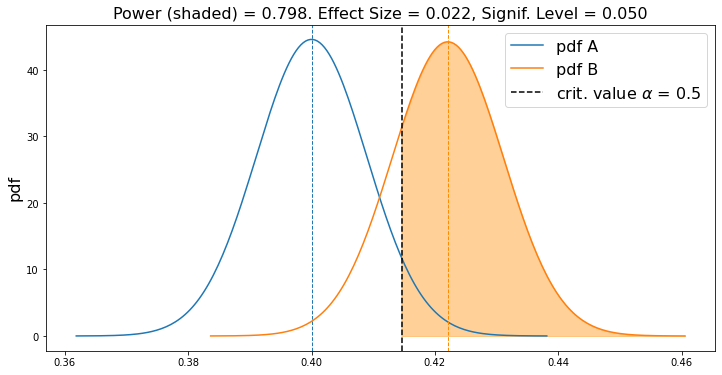

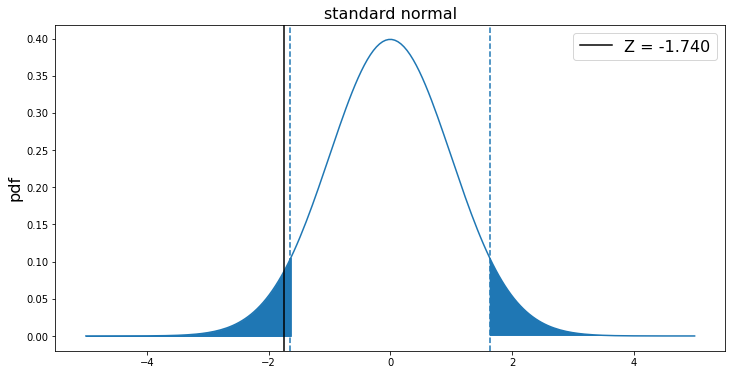

In [115]:
# sample sizes for the two groups
n_A = 3000
n_B = 3000

# proportions of success = conversion rate
p_A = .4
p_B = .4221

# significance level
sl = 0.05

sigma_A = np.sqrt(p_A * (1 - p_A) / n_A)
sigma_B = np.sqrt(p_B * (1 - p_B) / n_B)

p_hat = (p_A * n_A + p_B * n_B)/(n_A + n_B)
se = np.sqrt(p_hat * (1 - p_hat) * (1/n_A + 1/n_B))
Z = (p_A - p_B) / se

norm_A = stats.norm(loc=p_A, scale=sigma_A) 
norm_B = stats.norm(loc=p_B, scale=sigma_B) 

power = abplot(norm_A, norm_B, signif_level=sl)
two_prop_test(Z, sl)

**The minimum detectable effect size is 0.022** but now we have two groups of 3000 samples.